In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
from keras.models import Sequential
from keras.losses import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

Using TensorFlow backend.


Problem 1

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [0]:
def vectorize_sequences(sequences, dimension=10000):
# Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5, batch_size=512, verbose = 0)
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3190 - accuracy: 0.8776


#1)

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5, batch_size=512, verbose = 0)
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3268 - accuracy: 0.8778


The neural network with 3 hidden layers, attained an accuracy that slightly increased from 0.8776 to 0.8778.The loss increased from 0.3190 to 0.3268. Training time remained the same, so the network with 3 hidden layers appears to be the better choice.

#2)

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model2.fit(x_train, y_train, epochs=5, batch_size=512, verbose = 0)
results2 = model2.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3413 - accuracy: 0.8738


In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model3.fit(x_train, y_train, epochs=5, batch_size=512, verbose = 0)
results3 = model3.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3806 - accuracy: 0.8656


The fist model attained a better accuracy and loss score, than the model2 and model3. Model2 has the same number of hidden layers, but it has 32 hidden units. The accuracy decreased from .8776 to .8656. The loss increased from 
.3190 to .3806. The runtime was remained the same for model2, but it slightly increased for model3. Similar to the second model, model3 with 64 hidden units performed worse than the original.

#3)

In [0]:
model4= models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [0]:
model4.fit(x_train, y_train, epochs=5, batch_size=512, verbose = 0)
results4 = model4.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.0884 - accuracy: 0.8803


Runtime is the same for this model and the original one. The loss is .0884 as compared to the first model with a loss of .3190. The accuracy is slighly better for the fourth model, since it change from .8776 to .8803. It seems that changing the loss to mse will help the model perform better.

#4)

In [0]:
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model5.add(layers.Dense(16, activation='tanh'))
model5.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model5.fit(x_train, y_train, epochs=5, batch_size=512, verbose = 0)
results5 = model5.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3456 - accuracy: 0.8741


Runtime did not change from the first to the fifth model. Accuracy decreased from .8776 to .8741, and loss increased from .3190 to .3456. The first model outperforms this model.

Problem 2


#1)

In [0]:
car = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                  sep =' ',
                  na_values = '?',
                  names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin','car_name'],
                  skipinitialspace = True,
                  comment = '\t')

In [0]:
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [0]:
car = car.drop('car_name', axis=1)
car.shape

(398, 8)

In [0]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [0]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [0]:
car.dropna(inplace=True)
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [0]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [0]:
new_car = pd.get_dummies(car, columns=["origin"])

In [0]:
new_car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


# 2)

In [0]:
Y_car = new_car['mpg']
Y_car.shape

(392,)

In [0]:
X_car = new_car.drop('mpg', axis = 1)
X_car.shape

(392, 9)

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_car, Y_car, random_state = 1, train_size = 0.8)

#3)

In [0]:
new_car.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [0]:
mean = Xtrain.mean(axis=0)
Xtrain -= mean
std = Xtrain.std(axis=0)
Xtrain /= std

Xtest -= mean
Xtest /= std

#4)

In [0]:
modelc = models.Sequential()
modelc.add(layers.Dense(32, activation='relu',input_shape=(Xtrain.shape[1],)))
modelc.add(layers.Dense(32, activation='relu'))
modelc.add(layers.Dense(1))

In [0]:
modelc.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#5)

In [0]:
xval, par_x_train = np.split(Xtrain, [int(0.2 * len(Xtrain))])
yval, par_y_train = np.split(ytrain, [int(0.2 * len(ytrain))])

In [0]:
yval.shape

(62,)

In [0]:
xval.shape

(62, 9)

In [0]:
par_y_train.shape

(251,)

In [0]:
par_x_train.shape

(251, 9)

In [0]:
historyc = modelc.fit(par_x_train,
                    par_y_train,
                    epochs=500,
                    batch_size=8,
                    validation_data=(xval, yval))

Epoch 1/500
32/32 [==============================] - 0s 5ms/step - loss: 580.0864 - mae: 22.6716 - val_loss: 533.0598 - val_mae: 21.7298
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 491.5183 - mae: 20.8349 - val_loss: 448.2275 - val_mae: 19.5558
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 398.2892 - mae: 18.3437 - val_loss: 344.2928 - val_mae: 16.6602
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 295.1903 - mae: 15.4007 - val_loss: 236.1236 - val_mae: 13.4402
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 192.4304 - mae: 12.1730 - val_loss: 127.9815 - val_mae: 9.7864
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 94.2468 - mae: 8.4376 - val_loss: 52.3653 - val_mae: 6.1252
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 36.4546 - mae: 4.9315 - val_loss: 25.2914 - val_mae: 4.0654
Epoch 8/500
32/32 [==============================]

In [0]:
history_dict = historyc.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

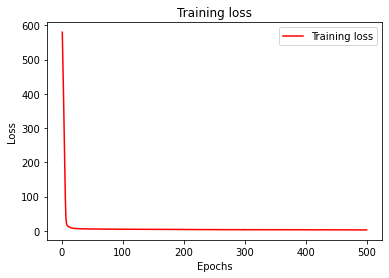

In [0]:
mae = history_dict['mae']
val_mae = history_dict['val_mae']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

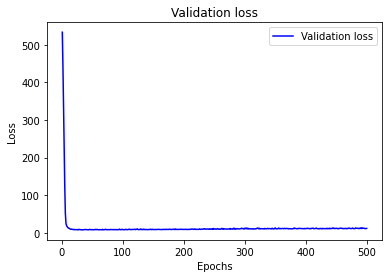

In [0]:
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

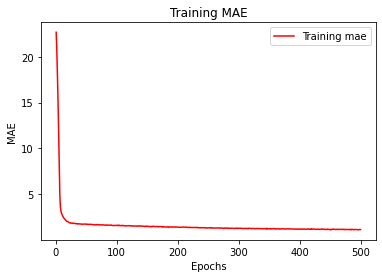

In [0]:
plt.clf()   # clear figure
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

plt.plot(epochs, mae, 'r', label='Training mae')
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

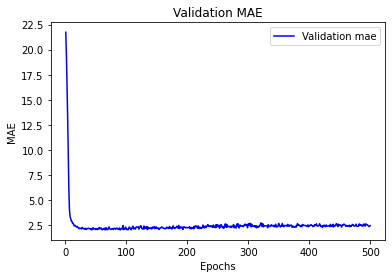

In [0]:
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

#6)

In [0]:
modelc.fit(Xtrain, ytrain,
          epochs=15, batch_size=8, verbose=0)
test_mse_score, test_mae_score = modelc.evaluate(Xtest, ytest)

3/3 [==============================] - 0s 969us/step - loss: 9.1743 - mae: 2.0432


In [0]:
test_mae_score

2.0431718826293945

In [0]:
modelc.fit(Xtrain, ytrain,
          epochs=20, batch_size=8, verbose=0)
test_mse_score, test_mae_score = modelc.evaluate(Xtest, ytest)

3/3 [==============================] - 0s 1ms/step - loss: 8.8802 - mae: 1.9626


In [0]:
test_mae_score

1.9626014232635498

In [0]:
modelc.fit(Xtrain, ytrain,
          epochs=18, batch_size=8, verbose=0)
test_mse_score, test_mae_score = modelc.evaluate(Xtest, ytest)

3/3 [==============================] - 0s 917us/step - loss: 9.4565 - mae: 1.9938


In [0]:
test_mae_score

1.993788719177246